# Step 1: Problem Statement: To predict if a customer will pay their premium on time or not.

## Step 2: Hypothesis Generation:
Following can be the factors that can be used to predict if a customer will pay their premium on time:
1. Whether previous premium is payed.
2. Time of previous payment
3. Type of job
4. Area of residence

## Step 3: Data Extraction:
Files have been provided beforehand.

## Step 4: Data Exploration:
Given below:

In [1]:
#Importing important modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sea
from sklearn.linear_model import LinearRegression

In [2]:
#Reading the data
data = pd.read_csv("train.csv")

In [3]:
#Displaying first five rows
data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [4]:
#Checking number of rows and columns
data.shape

(79853, 12)

In [5]:
#Displaying names of columns
data.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

## Variable Identification:
Dependent Variable: Target
Independent Variable: perc_premium_paid_by_cash_credit', age_in_days, Income, Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late, application_underwriting_score, no_of_premiums_paid, sourcing_channel, residence_area_type

In [6]:
data.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

Here, sourcing_channel, residence_area_type are categorical variables and rest others are continuous variables.

# Univariate Analysis

In [9]:
data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


Here we can see that count_3-6_months_late, count_6-12_months_late, count_more_than_12_months_late, and application_underwriting_score have missing values. We will fill these missing values later in this segment.

<AxesSubplot:>

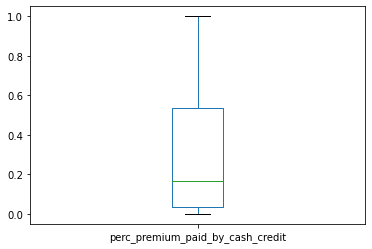

In [12]:
data["perc_premium_paid_by_cash_credit"].plot.box()

<AxesSubplot:>

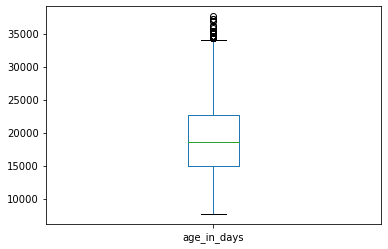

In [13]:
data["age_in_days"].plot.box()

<AxesSubplot:>

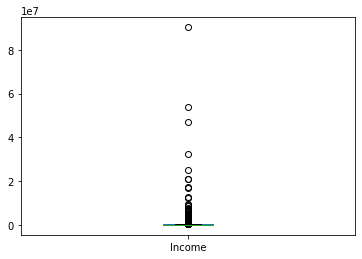

In [14]:
data["Income"].plot.box()

<AxesSubplot:>

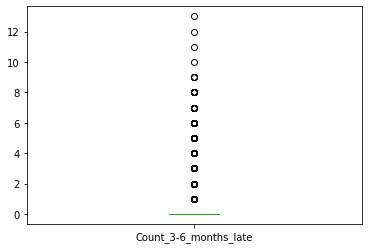

In [16]:
data["Count_3-6_months_late"].plot.box()

<AxesSubplot:>

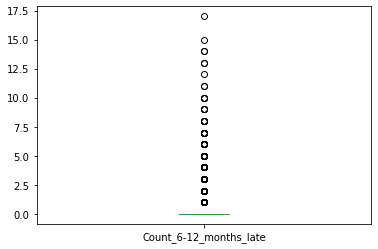

In [17]:
data["Count_6-12_months_late"].plot.box()

<AxesSubplot:>

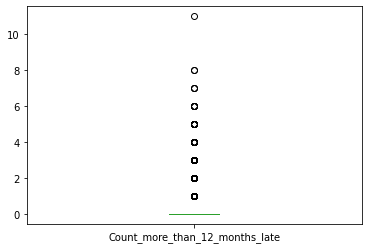

In [18]:
data["Count_more_than_12_months_late"].plot.box()

<AxesSubplot:>

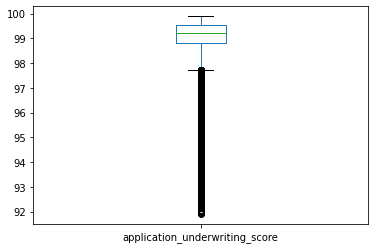

In [19]:
data["application_underwriting_score"].plot.box()

<AxesSubplot:>

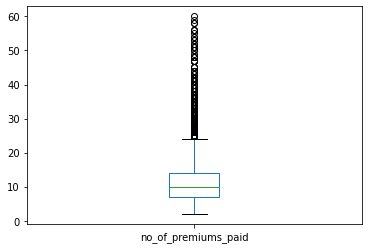

In [20]:
data["no_of_premiums_paid"].plot.box()

<AxesSubplot:>

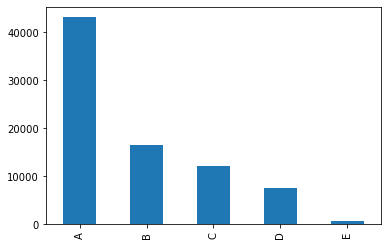

In [23]:
data["sourcing_channel"].value_counts().plot.bar()

<AxesSubplot:>

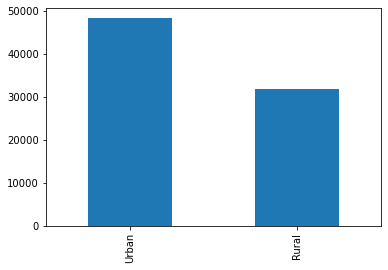

In [24]:
data["residence_area_type"].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

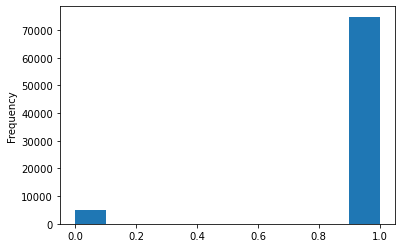

In [25]:
data["target"].plot.hist()

# Bivariate Analysis
### Our target variable here is continuous, hence we will perform continuous-continuous B.A. and continuous-categorical B.A.

In [26]:
data.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


### Continuous-Continuous Bivariate Analysis

<AxesSubplot:xlabel='target', ylabel='perc_premium_paid_by_cash_credit'>

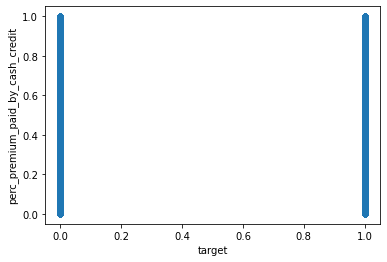

In [27]:
data.plot.scatter("target", "perc_premium_paid_by_cash_credit")

<AxesSubplot:xlabel='target', ylabel='age_in_days'>

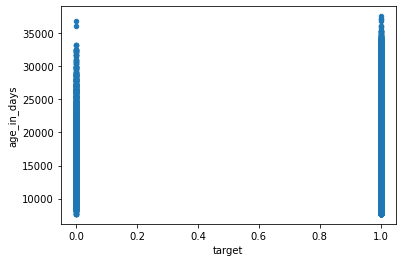

In [28]:
data.plot.scatter("target", "age_in_days")

<AxesSubplot:xlabel='target', ylabel='Income'>

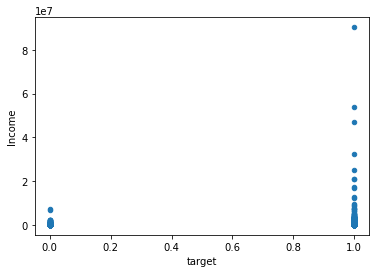

In [29]:
data.plot.scatter("target", "Income")

<AxesSubplot:xlabel='target', ylabel='Count_3-6_months_late'>

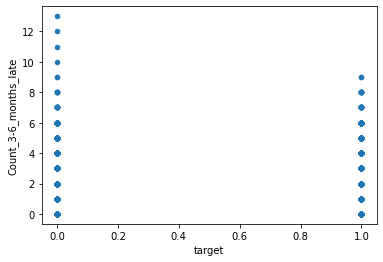

In [30]:
data.plot.scatter("target", "Count_3-6_months_late")

<AxesSubplot:xlabel='target', ylabel='Count_6-12_months_late'>

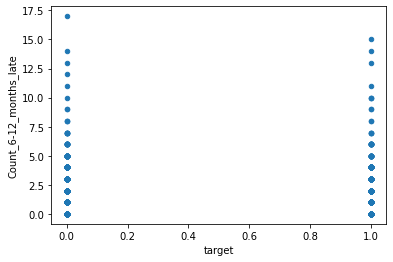

In [31]:
data.plot.scatter("target", "Count_6-12_months_late")

<AxesSubplot:xlabel='target', ylabel='Count_more_than_12_months_late'>

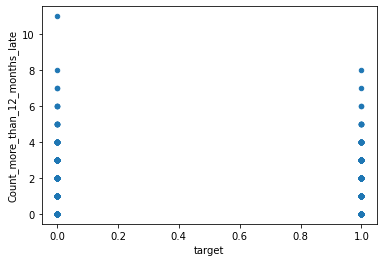

In [32]:
data.plot.scatter("target", "Count_more_than_12_months_late")

<AxesSubplot:xlabel='target', ylabel='application_underwriting_score'>

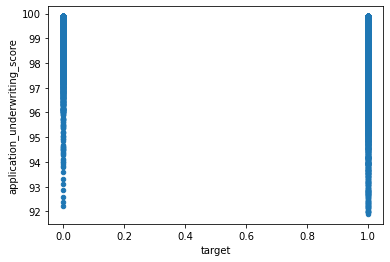

In [33]:
data.plot.scatter("target", "application_underwriting_score")

<AxesSubplot:xlabel='target', ylabel='no_of_premiums_paid'>

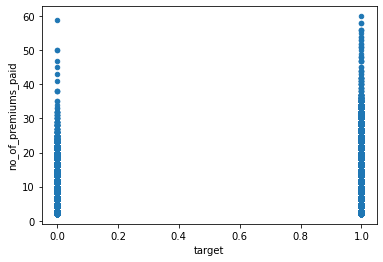

In [34]:
data.plot.scatter("target", "no_of_premiums_paid")

### Continuous-Categorical Bivariate Analysis


In [36]:
pd.crosstab[data["target"], data["sourcing_channel"]

SyntaxError: unexpected EOF while parsing (<ipython-input-36-0ed9f73f063c>, line 1)